Epoch 1/100
9/9 [==============================] - 2s 42ms/step - loss: 0.1603 - val_loss: 0.0960
Epoch 2/100
9/9 [==============================] - 0s 12ms/step - loss: 0.0579 - val_loss: 0.0246
Epoch 3/100
9/9 [==============================] - 0s 11ms/step - loss: 0.0124 - val_loss: 0.0059
Epoch 4/100
9/9 [==============================] - 0s 10ms/step - loss: 0.0056 - val_loss: 0.0038
Epoch 5/100
9/9 [==============================] - 0s 9ms/step - loss: 0.0024 - val_loss: 0.0017
Epoch 6/100
9/9 [==============================] - 0s 9ms/step - loss: 9.9085e-04 - val_loss: 2.5030e-04
Epoch 7/100
9/9 [==============================] - 0s 10ms/step - loss: 1.8632e-04 - val_loss: 9.4117e-05
Epoch 8/100
9/9 [==============================] - 0s 9ms/step - loss: 8.0813e-05 - val_loss: 1.0724e-04
Epoch 9/100
9/9 [==============================] - 0s 11ms/step - loss: 6.5015e-05 - val_loss: 5.4931e-05
Epoch 10/100
9/9 [==============================] - 0s 10ms/step - loss: 3.8808e-05 - val

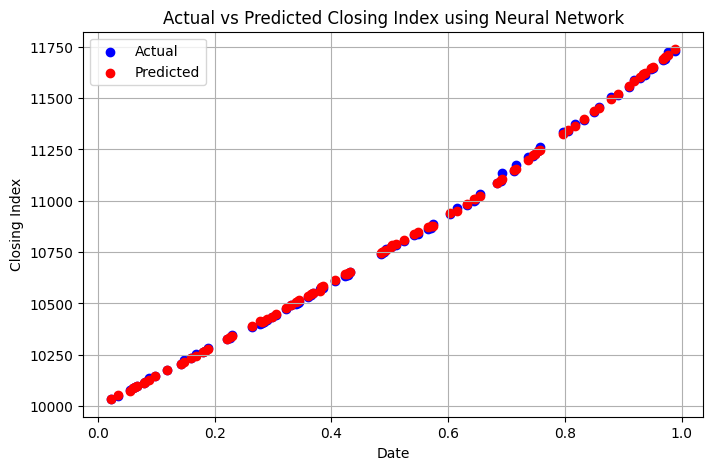

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

# Import data from CSV file
df = pd.read_csv('HBLTTI_1.csv')

# Convert date to ordinal number
df['Date'] = pd.to_datetime(df['Date'])
df['Date_ordinal'] = df['Date'].apply(lambda x: x.toordinal())

# Split data into training and testing sets (60% training, 40% testing)
X = df[['Date_ordinal', 'Open Index']]
y = df['Closing Index']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

# Normalize the data
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()
X_train = scaler_X.fit_transform(X_train)
X_test = scaler_X.transform(X_test)
y_train = scaler_Y.fit_transform(y_train.values.reshape(-1, 1))
y_test = scaler_Y.transform(y_test.values.reshape(-1, 1))

# Build a simple neural network model
model = keras.Sequential([
    keras.layers.Dense(64, activation='relu', input_shape=(X_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=100, batch_size=16, validation_data=(X_test, y_test))

# Predict the Closing Index for the test set
y_pred = model.predict(X_test)

# Inverse transform the predictions to original scale
y_test = scaler_Y.inverse_transform(y_test)
y_pred = scaler_Y.inverse_transform(y_pred)

# Plot actual vs predicted values
plt.figure(figsize=(8, 5))
plt.scatter(X_test[:, 0], y_test, color='blue', label='Actual')
plt.scatter(X_test[:, 0], y_pred, color='red', label='Predicted')
plt.title('Actual vs Predicted Closing Index using Neural Network')
plt.xlabel('Date')
plt.ylabel('Closing Index')
plt.legend()
plt.grid(True)
plt.show()